In [ ]:
import numpy as np
import pandas as pd


In [ ]:
rows = 1258
columns = 28

In [ ]:
df = pd.read_csv("drive/MyDrive/GDOW30.csv", nrows = rows)

In [ ]:
assetLabels = df.columns[1:columns+1].tolist()
print(assetLabels)

['3M', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'V', 'WBA', 'WMT']


In [ ]:
stockPrice = df.iloc[0:, 1:]
print(stockPrice.shape)

(1258, 28)


In [ ]:
print(stockPrice)

              3M         AXP        AMGN        AAPL          BA         CAT  \
0     201.360001  104.510002  198.020004   55.162498  355.980011  128.710007   
1     192.550003  104.379997  197.639999   55.682499  350.049988  118.980003   
2     184.539993  101.839996  187.880005   53.772499  354.649994  112.339996   
3     184.990005  103.599998  188.100006   54.950001  363.769989  115.629997   
4     184.949997  101.250000  185.979996   54.075001  359.269989  115.050003   
...          ...         ...         ...         ...         ...         ...   
1253   89.940002  152.789993  286.880005  178.720001  184.929993  270.790009   
1254   90.550003  154.389999  284.420013  177.149994  185.600006  272.649994   
1255   88.400002  151.529999  283.579987  175.839996  185.690002  259.220001   
1256   87.059998  149.619995  280.600006  175.460007  182.789993  252.889999   
1257   86.550003  141.570007  278.809998  172.880005  180.039993  249.199997   

             CVX       CSCO         KO 

In [ ]:
def StockReturnsComputing(StockPrice, Rows, Columns):
    import numpy as np
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

In [ ]:
stockPriceArray = np.asarray(stockPrice)
[Rows, Cols]=stockPriceArray.shape
stockReturns = StockReturnsComputing(stockPriceArray, Rows, Cols)
print('Daily returns of selective Dow 30 stocks\n', stockReturns)

Daily returns of selective Dow 30 stocks
 [[-4.3752473  -0.12439479 -0.19190233 ... -1.08077646 -0.50225369
   0.67943587]
 [-4.15996358 -2.43341739 -4.93826859 ... -3.49338713 -3.96065871
  -0.24540388]
 [ 0.24385608  1.72820313  0.11709655 ...  4.66260184  2.07547313
   1.66051869]
 ...
 [-2.37437982 -1.8524516  -0.29534701 ... -1.54643286 -7.00218818
   0.07433713]
 [-1.51584159 -1.26047912 -1.0508432  ... -1.54124857 -1.36471059
  -0.47665534]
 [-0.58579716 -5.38028891 -0.63792158 ... -0.18390702  1.43130255
  -1.25023882]]


In [ ]:
meanReturns = np.mean(stockReturns, axis = 0)
print('Mean returns of Dow Stocks:\n',  meanReturns)
covReturns = np.cov(stockReturns, rowvar=False)
print('Variance-covariance matrix of returns of Dow Stocks:\n')
print(covReturns)

Mean returns of Dow Stocks:
 [-0.05139465  0.05240133  0.04024095  0.11280345 -0.00291875  0.07466813
  0.05364366  0.02798723  0.02295209 -0.00624913  0.04600277  0.05428822
  0.03105905  0.02225972  0.00973131  0.01624854  0.04403955  0.0456822
  0.04207905  0.10627205  0.04672582  0.05173788  0.05876177  0.03765267
  0.07337513  0.05674803 -0.0799961   0.04882515]
Variance-covariance matrix of returns of Dow Stocks:

[[ 3.13719879  2.25032988  1.16200524  1.65554155  2.26329764  2.30067286
   1.81189939  1.71738795  1.17226264  1.74089705  2.12511573  1.68313109
   2.02221452  1.71583604  1.89933288  1.04104349  1.99450502  1.16805998
   0.79478229  1.4479057   1.77209261  0.99518377  1.45087603  1.43287805
   1.31596709  1.60864638  1.86757595  0.73044226]
 [ 2.25032988  5.74120518  1.30043876  2.43502802  4.92152267  3.04198708
   3.36985439  2.28501471  1.73111251  3.26238883  3.70032662  2.29905041
   2.99859141  2.27040212  2.70488427  1.16978108  3.81849213  2.00171101
   1.10

In [ ]:
#Computing betas of 15 stocks compared to DOW market over past 5 years

import numpy as np
import pandas as pd

stockRows = 1258
stockColumns = 15
marketRows = 1258
marketColumns = 7

dfStock = pd.read_csv("drive/MyDrive/15Companies.csv", nrows = stockRows)
dfMarket = pd.read_csv("drive/MyDrive/DJIAMarket2.csv", nrows = marketRows)

#extract asset labels of stocks in the portfolio
assetLabels = dfStock.columns[1:stockColumns+1].tolist()
print('Portfolio stocks\n', assetLabels)

#extract asset prices data and market data
stockData = dfStock.iloc[0:, 1:]
marketData = dfMarket.iloc[0:, [4]] #closing price

#compute asset returns
arrayStockData = np.asarray(stockData)
[sRows, sCols] = arrayStockData.shape
stockReturns = StockReturnsComputing(arrayStockData, sRows, sCols)


#compute market returns
arrayMarketData = np.asarray(marketData)
[mRows, mCols]=arrayMarketData.shape
marketReturns = StockReturnsComputing(arrayMarketData, mRows, mCols)

#compute betas of assets in the portfolio
beta= []
Var = np.var(marketReturns, ddof =1)
for i in range(stockColumns):
    CovarMat = np.cov(marketReturns[:,0], stockReturns[:, i ])
    Covar  = CovarMat[1,0]
    beta.append(Covar/Var)


#output betas of assets in the portfolio
print('Asset Betas:')
for data in beta:
    print('{:9.3f}'.format(data))

print("𝛽=0 implies that the stock return is uncorrelated with the market movements, \n𝛽<0 implies that the stock return inversely follows the market movements, and \n𝛽>0 implies that the stock return follows the market movements.")

Portfolio stocks
 ['3M', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC']
Asset Betas:
    0.903
    1.418
    0.676
    1.131
    1.655
    1.107
    1.152
    0.969
    0.681
    1.087
    1.258
    1.031
    1.060
    0.902
    1.160
𝛽=0 implies that the stock return is uncorrelated with the market movements, 
𝛽<0 implies that the stock return inversely follows the market movements, and 
𝛽>0 implies that the stock return follows the market movements.


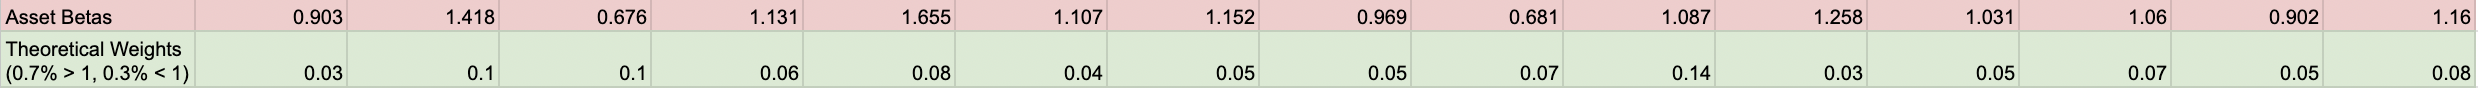

In [ ]:
assetBetas = np.array([0.903,1.418,0.676,1.131,1.655,1.107,1.152,0.969,0.681,1.087,1.258,1.031,1.060,0.902,1.160])
assetWeights = np.array([0.03,0.1,0.1,0.06,0.08,0.04,0.05,0.05,0.07,0.14,0.03,0.05,0.07,0.05,0.08])

#Stock mean returns and covariance of returns
meanReturns = np.mean(stockReturns, axis = 0)
covReturns = np.cov(stockReturns, rowvar = False)

#Computing portfolio risk
portfolioRisk = np.matmul((np.matmul(assetWeights,covReturns)), np.transpose(assetWeights))

#compute annualized portfolio risk for trading days = 251
annualizedRisk  =   np.sqrt(portfolioRisk*251)

#compute expected portfolio return
portfolioReturn = np.matmul(np.array(meanReturns),assetWeights.T)

#compute annualized expected portfolio return
annualizedReturn = 251*np.array(portfolioReturn)

#compute portfolio beta
portfolioBeta = np.matmul(assetBetas,assetWeights.T)

#display results
print("\n Annualized Portfolio Risk: %4.2f" % annualizedRisk,"%")
print("\n Annualized Expected Portfolio Return: %4.2f" % annualizedReturn,"%")
print("\n Portfolio Beta:%4.2f" % portfolioBeta)


 Annualized Portfolio Risk: 24.03 %

 Annualized Expected Portfolio Return: 7.58 %

 Portfolio Beta:1.09
